In [11]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import chi2
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import random
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [2]:
#reading data into a dataframe
data=pd.read_csv('highUtilizationPredictionV2wco.csv')
data.columns

Index(['race', 'age', 'patient_id', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',
       'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11',
       'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18',
       'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25',
       'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5',
       'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14',
       'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23',
       'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5',
       'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10',
       'drugs_m10-11', 'drugs_m11-12', 'HighUtilizationY2', 'claimCount'],
      dtype='object')

In [3]:
data.shape

(113024, 68)

In [4]:
race_dummies=pd.get_dummies(data['race'])
newdf=pd.concat([data,race_dummies],axis=1)

In [5]:
newdf.shape

(113024, 75)

In [6]:
del newdf['race']
del newdf['patient_id']
Y=newdf['HighUtilizationY2']
del newdf['HighUtilizationY2']
del newdf['claimCount']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(newdf, Y, test_size=0.2)

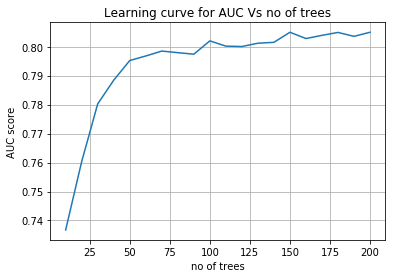

In [8]:
# question 1: 20 models with different number of trees
x=list(range(10,210,10))
values=[]
for i in range(10,210,10):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    rf_probs = model.predict_proba(X_test)[:, 1]
    auc_value = roc_auc_score(y_test, rf_probs)
    values.append(auc_value)
plt.plot(x,values)
plt.xlabel('no of trees')
plt.ylabel('AUC score')
plt.title('Learning curve for AUC Vs no of trees')
plt.grid(True)

In [17]:
#Ranking of attributes using Randomforest feature importance
model = RandomForestClassifier(n_estimators=110)
model.fit(X_train, y_train)
f_val=model.feature_importances_
f_name=X_train.columns
features=pd.DataFrame()
features['f_name']=f_name
features['f_val']=f_val
features=features.sort_values('f_val',ascending=False)
features

,f_name,f_val
0,age,1.147023e-01
6,ELIX6,3.093271e-02
14,ELIX14,2.943975e-02
50,G-22,2.629128e-02
40,G-12,2.596164e-02
63,drugs_m11-12,2.561132e-02
62,drugs_m10-11,2.381026e-02
52,drugs_m0-1,2.244113e-02
61,drugs_m9-10,2.213584e-02
55,drugs_m3-4,2.193388e-02


In [29]:
from sklearn.feature_selection import SelectKBest
test = SelectKBest(k=2)
test.fit(X_train, y_train)
f_name=X_train.columns
features1=pd.DataFrame()
features1['f_name']=f_name
features1['f_val']=test.scores_
features1=features1.sort_values('f_val',ascending=False)
features1

,f_name,f_val
6,ELIX6,3710.969603
50,G-22,3548.246246
14,ELIX14,3319.529511
45,G-17,2914.295719
30,G-2,2674.406895
21,ELIX21,2586.594967
13,ELIX13,2256.378668
39,G-11,2056.780922
8,ELIX8,1931.929861
40,G-12,1901.145715


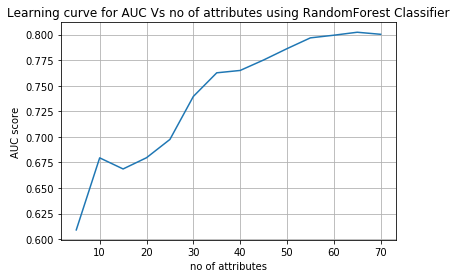

In [30]:
#learning curve for different number of attributes using random forest classifier
x1=list(range(5,75,5))
val1=[]
model = RandomForestClassifier(n_estimators=110)
for i in range(5,75,5):
    l=[]
    for j in range(i):
        l.append(features['f_name'][j])
    model.fit(X_train[l], y_train)
    rf_probs = model.predict_proba(X_test[l])[:, 1]
    auc_value = roc_auc_score(y_test, rf_probs)
    val1.append(auc_value)
plt.plot(x1,val1)
plt.xlabel('no of attributes')
plt.ylabel('AUC score')
plt.title('Learning curve for AUC Vs no of attributes using RandomForest Classifier')
plt.grid(True)

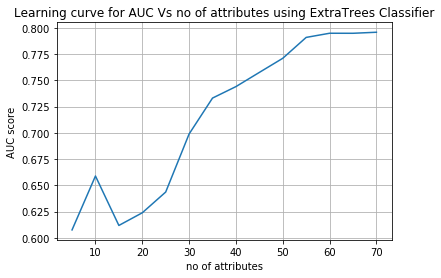

In [31]:
#learning curve for different number of attributes using extratrees classifier
x1=list(range(5,75,5))
val1=[]
et = ExtraTreesClassifier(n_estimators=130)
for i in range(5,75,5):
    l=[]
    for j in range(i):
        l.append(features['f_name'][j])
    et.fit(X_train[l], y_train)
    probs = et.predict_proba(X_test[l])[:, 1]
    auc_value = roc_auc_score(y_test, probs)
    val1.append(auc_value)
plt.plot(x1,val1)
plt.xlabel('no of attributes')
plt.ylabel('AUC score')
plt.title('Learning curve for AUC Vs no of attributes using ExtraTrees Classifier')
plt.grid(True)

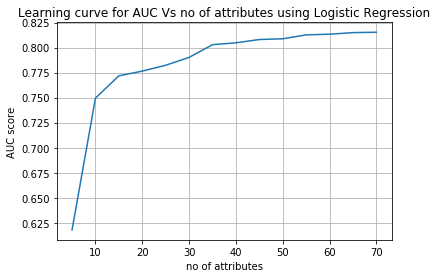

In [32]:
#learning curve for different number of attributes using logistic regression
x1=list(range(5,75,5))
val1=[]
clf = LogisticRegression()
for i in range(5,75,5):
    l=[]
    for j in range(i):
        l.append(features['f_name'][j])
    clf.fit(X_train[l], y_train)
    probs = clf.predict_proba(X_test[l])[:, 1]
    auc_value = roc_auc_score(y_test, probs)
    val1.append(auc_value)
plt.plot(x1,val1)
plt.xlabel('no of attributes')
plt.ylabel('AUC score')
plt.title('Learning curve for AUC Vs no of attributes using Logistic Regression')
plt.grid(True)

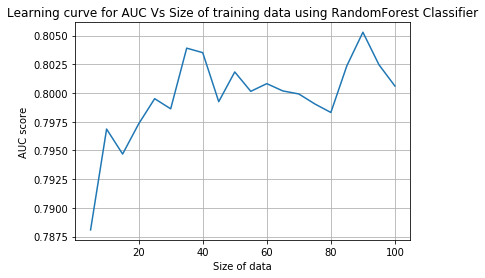

In [34]:
#learning curve for different size of training data using random forest classifier
x1=list(range(5,105,5))
val=[]
model = RandomForestClassifier(n_estimators=110)
for i in range(5,105,5):
    s=int((i/100)*len(X_train))
    model.fit(X_train[:s], y_train[:s])
    rf_probs = model.predict_proba(X_test)[:, 1]
    auc_value = roc_auc_score(y_test, rf_probs)
    val.append(auc_value)
plt.plot(x1,val)
plt.xlabel('Size of data')
plt.ylabel('AUC score')
plt.title('Learning curve for AUC Vs Size of training data using RandomForest Classifier')
plt.grid(True)

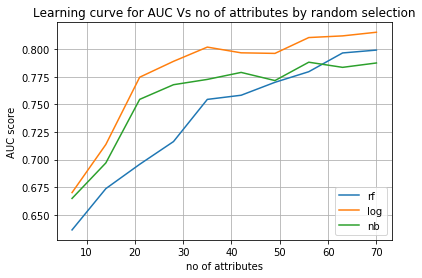

In [36]:
#learning curve for different number of attributes using random forest classifier, logistic regression and naive bayes
#Random selection
x1=list(range(7,77,7))
lst=list(X_train.columns)
val1=[]
val2=[]
val3=[]
rf = RandomForestClassifier(n_estimators=110)
logreg=LogisticRegression()
gnb=GaussianNB()
for i in range(7,77,7):
    l=[]
    l=random.sample(lst,i)
    rf.fit(X_train[l], y_train)
    rf_probs = rf.predict_proba(X_test[l])[:, 1]
    auc_value = roc_auc_score(y_test, rf_probs)
    val1.append(auc_value)
    logreg.fit(X_train[l], y_train)
    probs = logreg.predict_proba(X_test[l])[:, 1]
    auc_value2 = roc_auc_score(y_test, probs)
    val2.append(auc_value2)
    gnb.fit(X_train[l], y_train)
    gnb_probs=gnb.predict_proba(X_test[l])[:, 1]
    auc_value3 = roc_auc_score(y_test, gnb_probs)
    val3.append(auc_value3)

line1,=plt.plot(x1,val1)
line2,=plt.plot(x1,val2)
line3,=plt.plot(x1,val3)
plt.xlabel('no of attributes')
plt.ylabel('AUC score')
plt.title('Random Selection Learning curve')
plt.legend(handles=[line1, line2,line3],labels=['rf','log','nb'],loc='lower right')
plt.title('Learning curve for AUC Vs no of attributes by random selection')
plt.grid(True)
plt.show()

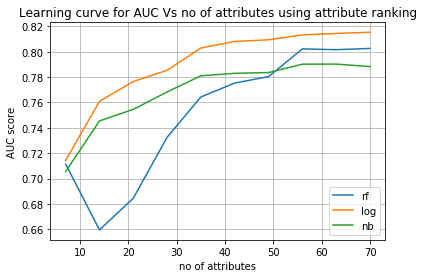

In [37]:
#learning curve for different number of attributes using random forest classifier, logistic regression and naive bayes
#using rank to select the attribute 
x1=list(range(7,77,7))
lst=list(X_train.columns)
val1=[]
val2=[]
val3=[]
rf = RandomForestClassifier(n_estimators=150)
logreg=LogisticRegression()
gnb=GaussianNB()
for i in range(7,77,7):
    l=[]
    for j in range(i):
        l.append(features['f_name'][j])
    rf.fit(X_train[l], y_train)
    rf_probs = rf.predict_proba(X_test[l])[:, 1]
    auc_value = roc_auc_score(y_test, rf_probs)
    val1.append(auc_value)
    logreg.fit(X_train[l], y_train)
    probs = logreg.predict_proba(X_test[l])[:, 1]
    auc_value2 = roc_auc_score(y_test, probs)
    val2.append(auc_value2)
    gnb.fit(X_train[l], y_train)
    gnb_probs=gnb.predict_proba(X_test[l])[:, 1]
    auc_value3 = roc_auc_score(y_test, gnb_probs)
    val3.append(auc_value3)

line1,=plt.plot(x1,val1)
line2,=plt.plot(x1,val2)
line3,=plt.plot(x1,val3)
plt.xlabel('no of attributes')
plt.ylabel('AUC score')
plt.title('rankwise Selection Learning curve')
plt.legend(handles=[line1, line2,line3],labels=['rf','log','nb'],loc='lower right')
plt.title('Learning curve for AUC Vs no of attributes using attribute ranking')
plt.grid(True)
plt.show()

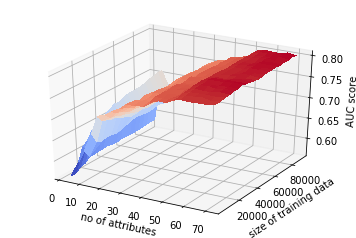

In [38]:
#3D PLot
lst=list(X_train.columns)
f,g,h=[],[],[]
rff=RandomForestClassifier(n_estimators=150)
for i in range(5,105,5):
    col=int((i/100)*len(lst))
    l=[]
    for j in range(col):
        l.append(features['f_name'][j])
    x_tr=X_train[l]
    y_tr=y_train
    a,b,c1=[],[],[]
    for j in range(5,105,5):
        s=int((j/100)*len(X_train))
        a.append(col)
        b.append(s)
        rff.fit(x_tr[:s],y_tr[:s])
        rf_probs = rff.predict_proba(X_test[l])[:, 1]
        auc_value = roc_auc_score(y_test, rf_probs)
        c1.append(auc_value)
    l=np.array(a)
    m=np.array(b)
    n=np.array(c1)
    f.append(l)
    g.append(m)
    h.append(n)
    
x=np.array(f)
y=np.array(g)
z=np.array(h)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('no of attributes')
ax.set_ylabel('size of training data')
ax.set_zlabel('AUC score')
plt.show()

In [39]:
%matplotlib qt 
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('no of attributes')
ax.set_ylabel('size of training data')
ax.set_zlabel('AUC score')
plt.show()